# Project Proposal: Gasoline Prices Weekly Average of cities in New York State

The dataset I chose is regarding the Gasoline Retail Prices Weekly Average by Region for the state of New York. The data source for this data set is  https://data.ny.gov/Energy-Environment/Gasoline-Retail-Prices-Weekly-Average-by-Region-Be/nqur-w4p7/data . I discovered the data while browsing the government portal for the state of New York. I was searching for datasets related to energy and development when I tumbled upon this. This dataset is an open source and freely available to access and download. It is legal and does not violate any rules. I browsed to check if someone had  previously carried out an EDA on this data set but did not find any citations or research papers related to it. The dataset has 615 rows and 18 columns with a total file size of 44kb. The dataset contains weekly average gasoline prices of different cities in the state of New York with different data types like date,int and float values. It has many missing values for a few cities. Data cleanup would be required to account for them. I found this particular dataset fascinating as I expected the average gasoline price of New York City to be the highest every week but found that White Plains dominated New York City in quite a number of weeks(the most famous city in America if not the world). I would like to further explore the reason for this and find other hidden stories in the data.

### Primary Observation

Based on my proposal I wanted to find how gasoline prices for each city of New York State varied from years 2007 to 2019. I found, contrary to my expectation, New York City did have the highest average price of gasoline every year compared to any other city in the state. One reason for White Plains not making it to the top is because the dataset contained price values from year 2016 to 2019 for a few cities hence it was not pragmatic to compare data from 2007-2019 and 2016-2019. 

Now that I had conducted EDA against all cities having no missing values,I wanted to analyze those cities having values from 2016-2019 and find which among them has the highest price of gasoline. I plotted the graphs to find White Plains to have the highest average gasoline price among the chosen countries.

Further, I wanted to find if the average price of gasoline in New York City currently (2019), was higher than the entire New York State Average. So, I conducted data analysis and plotted the results to find that the gasoline price of New York City was currently higher then the entire New York State Average. 




I imported the modules required to work with dataframes,analysis and plotting.

In [1]:
import pandas as pd
import numpy as np
import chardet
import matplotlib.pylab as plt
import datetime as datetime
import matplotlib.dates

Initially, to view the dataset as binary we open the file using the 'read binary' (rb). If we use wb(write binary), python would over-write the file.

In [2]:
with open('Gasoline_Retail_Prices_Weekly_Average_by_Region__Beginning_2007.csv','rb') as fraw:
    file_content = fraw.read()

To display the content of the file.

In [3]:
file_content

b'Date,New York State Average ($/gal),Albany Average ($/gal),Batavia Average ($/gal),Binghamton Average ($/gal),Buffalo Average ($/gal),Dutchess Average ($/gal),Elmira Average ($/gal),Glens Falls Average ($/gal),Ithaca Average ($/gal),Kingston Average ($/gal),Nassau Average ($/gal),New York City Average ($/gal),Rochester Average ($/gal),Syracuse Average ($/gal),Utica Average ($/gal),Watertown Average ($/gal),White Plains Average ($/gal)\r\n7/29/2019,2.88,2.74,2.83,2.79,2.83,2.93,2.77,2.8,2.81,2.78,2.89,3,2.83,2.78,2.84,2.81,3.02\r\n7/22/2019,2.89,2.76,2.84,2.84,2.85,2.95,2.8,2.81,2.84,2.8,2.9,3.01,2.84,2.8,2.85,2.82,3.03\r\n7/15/2019,2.88,2.75,2.84,2.82,2.85,2.94,2.77,2.79,2.82,2.79,2.89,2.99,2.84,2.79,2.84,2.81,3.02\r\n7/8/2019,2.88,2.75,2.84,2.8,2.86,2.93,2.78,2.78,2.81,2.8,2.88,2.97,2.85,2.78,2.83,2.81,3.01\r\n7/1/2019,2.86,2.73,2.79,2.76,2.85,2.92,2.76,2.76,2.76,2.78,2.86,2.95,2.82,2.77,2.83,2.79,3\r\n6/24/2019,2.85,2.72,2.78,2.74,2.85,2.93,2.73,2.75,2.75,2.78,2.86,2.95,2.81,2.76,2

To find the type of encoding for the file, we use the 'detect' function.

In [4]:
chardet.detect(file_content)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

Now, we read the dataset (csv file) using the pd.read_csv() function. To know the number of rows and columns present in the dataset, we use the shape function

In [5]:
gas_prices = pd.read_csv('Gasoline_Retail_Prices_Weekly_Average_by_Region__Beginning_2007.csv')
gas_prices.shape

(614, 18)

We create a dataframe using our dataset file and assign it to pd. To display the first 5 rows and columns of the dataframe, we use the head() function.

In [6]:
df=pd.read_csv("Gasoline_Retail_Prices_Weekly_Average_by_Region__Beginning_2007.csv",parse_dates=True)
df.head()

,Date,New York State Average ($/gal),Albany Average ($/gal),Batavia Average ($/gal),Binghamton Average ($/gal),Buffalo Average ($/gal),Dutchess Average ($/gal),Elmira Average ($/gal),Glens Falls Average ($/gal),Ithaca Average ($/gal),Kingston Average ($/gal),Nassau Average ($/gal),New York City Average ($/gal),Rochester Average ($/gal),Syracuse Average ($/gal),Utica Average ($/gal),Watertown Average ($/gal),White Plains Average ($/gal)
0,7/29/2019,2.88,2.74,2.83,2.79,2.83,2.93,2.77,2.80,2.81,2.78,2.89,3.00,2.83,2.78,2.84,2.81,3.02
1,7/22/2019,2.89,2.76,2.84,2.84,2.85,2.95,2.80,2.81,2.84,2.80,2.90,3.01,2.84,2.80,2.85,2.82,3.03
2,7/15/2019,2.88,2.75,2.84,2.82,2.85,2.94,2.77,2.79,2.82,2.79,2.89,2.99,2.84,2.79,2.84,2.81,3.02
3,7/8/2019,2.88,2.75,2.84,2.80,2.86,2.93,2.78,2.78,2.81,2.80,2.88,2.97,2.85,2.78,2.83,2.81,3.01
4,7/1/2019,2.86,2.73,2.79,2.76,2.85,2.92,2.76,2.76,2.76,2.78,2.86,2.95,2.82,2.77,2.83,2.79,3.00


Now that we have our dataframe, we can find the data type of each of the column using dtypes.

In [7]:
df.dtypes

Date                               object
New York State Average ($/gal)    float64
Albany Average ($/gal)            float64
Batavia Average ($/gal)           float64
Binghamton Average ($/gal)        float64
Buffalo Average ($/gal)           float64
Dutchess Average ($/gal)          float64
Elmira Average ($/gal)            float64
Glens Falls Average ($/gal)       float64
Ithaca Average ($/gal)            float64
Kingston Average ($/gal)          float64
Nassau Average ($/gal)            float64
New York City Average ($/gal)     float64
Rochester Average ($/gal)         float64
Syracuse Average ($/gal)          float64
Utica Average ($/gal)             float64
Watertown Average ($/gal)         float64
White Plains Average ($/gal)      float64
dtype: object

To further know the number of non-null elements in each column, we use the info() function.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 18 columns):
Date                              614 non-null object
New York State Average ($/gal)    614 non-null float64
Albany Average ($/gal)            614 non-null float64
Batavia Average ($/gal)           133 non-null float64
Binghamton Average ($/gal)        614 non-null float64
Buffalo Average ($/gal)           614 non-null float64
Dutchess Average ($/gal)          141 non-null float64
Elmira Average ($/gal)            141 non-null float64
Glens Falls Average ($/gal)       141 non-null float64
Ithaca Average ($/gal)            141 non-null float64
Kingston Average ($/gal)          141 non-null float64
Nassau Average ($/gal)            614 non-null float64
New York City Average ($/gal)     614 non-null float64
Rochester Average ($/gal)         614 non-null float64
Syracuse Average ($/gal)          614 non-null float64
Utica Average ($/gal)             614 non-null float64
Watertown Averag

We can use the describe function to find certain characteristics associated with the data like mean,max,min values of each column. This is very powerful and handy function to detect any anomalitites in the dataset.

In [9]:
df.describe(include='all')

,Date,New York State Average ($/gal),Albany Average ($/gal),Batavia Average ($/gal),Binghamton Average ($/gal),Buffalo Average ($/gal),Dutchess Average ($/gal),Elmira Average ($/gal),Glens Falls Average ($/gal),Ithaca Average ($/gal),Kingston Average ($/gal),Nassau Average ($/gal),New York City Average ($/gal),Rochester Average ($/gal),Syracuse Average ($/gal),Utica Average ($/gal),Watertown Average ($/gal),White Plains Average ($/gal)
count,614,614.000000,614.000000,133.000000,614.000000,614.000000,141.000000,141.000000,141.000000,141.000000,141.000000,614.000000,614.000000,614.000000,614.000000,614.000000,141.000000,141.000000
unique,614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,12/29/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.107818,3.024072,2.673459,3.051889,3.088355,2.760213,2.624043,2.633617,2.646950,2.629149,3.125293,3.194055,3.064951,3.019121,3.076987,2.715816,2.846667
std,NaN,0.619695,0.620468,0.209064,0.612626,0.619996,0.210375,0.223335,0.207923,0.207667,0.210342,0.631933,0.618942,0.617529,0.625317,0.621972,0.226741,0.212215
min,NaN,1.830000,1.780000,2.330000,1.710000,1.850000,2.390000,2.280000,2.260000,2.330000,2.280000,1.820000,1.900000,1.800000,1.760000,1.810000,2.380000,2.460000
25%,NaN,2.600000,2.520000,2.450000,2.550000,2.585000,2.560000,2.400000,2.450000,2.440000,2.420000,2.600000,2.682500,2.560000,2.492500,2.572500,2.490000,2.640000
50%,NaN,2.955000,2.870000,2.670000,2.915000,2.950000,2.740000,2.630000,2.650000,2.650000,2.610000,2.990000,3.055000,2.930000,2.900000,2.930000,2.710000,2.830000
75%,NaN,3.730000,3.630000,2.840000,3.670000,3.720000,2.960000,2.820000,2.810000,2.840000,2.820000,3.757500,3.820000,3.690000,3.630000,3.700000,2.930000,3.030000


Now, we know the satistics of our data. Let's find the first 5 values of data in each column. We can employ the .iteritems() to iterate through the data types. the nunique() function helps in finding the number of unique entries in the column.

In [10]:
first_n_entries=5
for col,col_type in df.dtypes.iteritems():
    print('\n',col,'has',df[col].nunique(),'unique entries; first ',first_n_entries,'are')
    print(df[col][0:first_n_entries])


 Date has 614 unique entries; first  5 are
0    7/29/2019
1    7/22/2019
2    7/15/2019
3     7/8/2019
4     7/1/2019
Name: Date, dtype: object

 New York State Average ($/gal) has 201 unique entries; first  5 are
0    2.88
1    2.89
2    2.88
3    2.88
4    2.86
Name: New York State Average ($/gal), dtype: float64

 Albany Average ($/gal) has 199 unique entries; first  5 are
0    2.74
1    2.76
2    2.75
3    2.75
4    2.73
Name: Albany Average ($/gal), dtype: float64

 Batavia Average ($/gal) has 55 unique entries; first  5 are
0    2.83
1    2.84
2    2.84
3    2.84
4    2.79
Name: Batavia Average ($/gal), dtype: float64

 Binghamton Average ($/gal) has 203 unique entries; first  5 are
0    2.79
1    2.84
2    2.82
3    2.80
4    2.76
Name: Binghamton Average ($/gal), dtype: float64

 Buffalo Average ($/gal) has 195 unique entries; first  5 are
0    2.83
1    2.85
2    2.85
3    2.86
4    2.85
Name: Buffalo Average ($/gal), dtype: float64

 Dutchess Average ($/gal) has 63 unique en

To find the number of null elements in each column, we use the isnull.sum() function.

In [36]:
df.isnull().sum()

Date                                0
New York State Average ($/gal)      0
Albany Average ($/gal)              0
Batavia Average ($/gal)           481
Binghamton Average ($/gal)          0
Buffalo Average ($/gal)             0
Dutchess Average ($/gal)          473
Elmira Average ($/gal)            473
Glens Falls Average ($/gal)       473
Ithaca Average ($/gal)            473
Kingston Average ($/gal)          473
Nassau Average ($/gal)              0
New York City Average ($/gal)       0
Rochester Average ($/gal)           0
Syracuse Average ($/gal)            0
Utica Average ($/gal)               0
Watertown Average ($/gal)         473
White Plains Average ($/gal)      473
year                                0
month                               0
dtype: int64

To find the percentage of missing values of each column, we divide the isnull.sum() elements with the total number of elements in the dataset.

In [12]:
(df.isnull().sum()/len(df)).sort_values(ascending=False)

Batavia Average ($/gal)           0.783388
White Plains Average ($/gal)      0.770358
Kingston Average ($/gal)          0.770358
Dutchess Average ($/gal)          0.770358
Elmira Average ($/gal)            0.770358
Watertown Average ($/gal)         0.770358
Ithaca Average ($/gal)            0.770358
Glens Falls Average ($/gal)       0.770358
Nassau Average ($/gal)            0.000000
New York City Average ($/gal)     0.000000
Rochester Average ($/gal)         0.000000
Syracuse Average ($/gal)          0.000000
Buffalo Average ($/gal)           0.000000
Binghamton Average ($/gal)        0.000000
Utica Average ($/gal)             0.000000
Albany Average ($/gal)            0.000000
New York State Average ($/gal)    0.000000
Date                              0.000000
dtype: float64

To test the dataset, I have plotted the average price of gasoline for New York City.

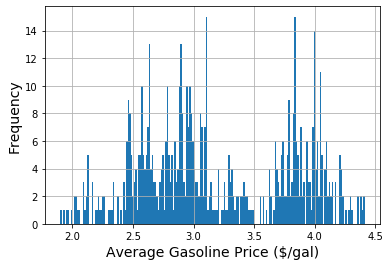

In [34]:
_=df['New York City Average ($/gal)'].hist(bins=203)
_=plt.ylabel('Frequency',fontsize=14)
_=plt.xlabel('Average Gasoline Price ($/gal)',fontsize=14)

To see how a scatter plot would look like, I plotted the same data. To have a scatter plot, we need to give the values as a serial function.

In [14]:
ser=df['New York City Average ($/gal)']
ser[0:10]

0    3.00
1    3.01
2    2.99
3    2.97
4    2.95
5    2.95
6    2.98
7    3.02
8    3.05
9    3.07
Name: New York City Average ($/gal), dtype: float64

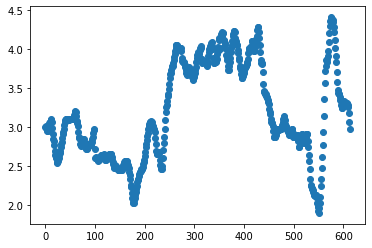

In [15]:
plt.scatter(ser.index, ser)
plt.show()

### Data Cleaning

Intially, I planned on filling the columns having missing data from years 2016 to 2007 with mean of the columns. This was not a feasible option as that would mean average price of gasoline in 2007 would be similar to that in 2019. Hence, I came up with an idea to split my analysis. I did two seperate visualizations:

1. For columns having no missing data from 2007-2019
2. For columns having missing data from 2007-2019

But even after this I had to do some cleaning. The date column of the data set initially had a datatype of object. Since, my vision was to plot values against each year, I had to first convert the data column datatype from object to datatime. Then, to extract the year value from the date, I converted the date column into an integer type. 

Since, my dataset had a format of mm/dd/YYYY, I formatted the column similarly.

In [16]:
df['Date'] = pd.to_datetime(df['Date'],format=('%m/%d/%Y'))

Creating the year column in the dataframe and assigning its data type as integer value.

In [17]:
df['year']=df['Date'].dt.year

To verify whether the column was created and datatypes were changed, we can use dtypes again.

In [18]:
df.dtypes

Date                              datetime64[ns]
New York State Average ($/gal)           float64
Albany Average ($/gal)                   float64
Batavia Average ($/gal)                  float64
Binghamton Average ($/gal)               float64
Buffalo Average ($/gal)                  float64
Dutchess Average ($/gal)                 float64
Elmira Average ($/gal)                   float64
Glens Falls Average ($/gal)              float64
Ithaca Average ($/gal)                   float64
Kingston Average ($/gal)                 float64
Nassau Average ($/gal)                   float64
New York City Average ($/gal)            float64
Rochester Average ($/gal)                float64
Syracuse Average ($/gal)                 float64
Utica Average ($/gal)                    float64
Watertown Average ($/gal)                float64
White Plains Average ($/gal)             float64
year                                       int64
dtype: object

For plotting, we create a list of all the years.

In [19]:
Years=[2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]

For each city, we can create a list and append values to find mean of the city column.

In [20]:
col1=[]
col2=[]
col4=[]
col5=[]
col11=[]
col12=[]
col13=[]
col14=[]
col15=[]

for i in Years:
    col1.append(df[df['year']==i]['New York State Average ($/gal)'].mean())
for i in Years:
    col2.append(df[df['year']==i]['Albany Average ($/gal)'].mean())
for i in Years:
    col4.append(df[df['year']==i]['Binghamton Average ($/gal)'].mean())
for i in Years:
    col5.append(df[df['year']==i]['Buffalo Average ($/gal)'].mean())
for i in Years:
    col11.append(df[df['year']==i]['Nassau Average ($/gal)'].mean())
for i in Years:
    col12.append(df[df['year']==i]['New York City Average ($/gal)'].mean())
for i in Years:
    col13.append(df[df['year']==i]['Rochester Average ($/gal)'].mean())
for i in Years:
    col14.append(df[df['year']==i]['Syracuse Average ($/gal)'].mean())
for i in Years:
    col15.append(df[df['year']==i]['Utica Average ($/gal)'].mean())

Now, without overwriting the original dataframe, we crate a new one and add x, y values for plotting to a dictionary with each key denoting City name and value denoting the mean values in each year.

In [21]:
df1=pd.DataFrame({'NY State':col1,'Albany':col2,'Binghamton':col4,'Buffalo':col5,'Nassau':col11,'NY City':col12,'Rochester':col13,'Syracuse':col14,'Utica':col15},index=Years)

Now, we plot the values using the plot.bar function. The 'gcf' function gets the current figure. As the number of bars are more, we increase the total figure size. Now, by default the legend(table of colours with each denoting a specific entitiy) is included inside the plot. To place it outside the graph, we use the bbox_to_anchor function. 

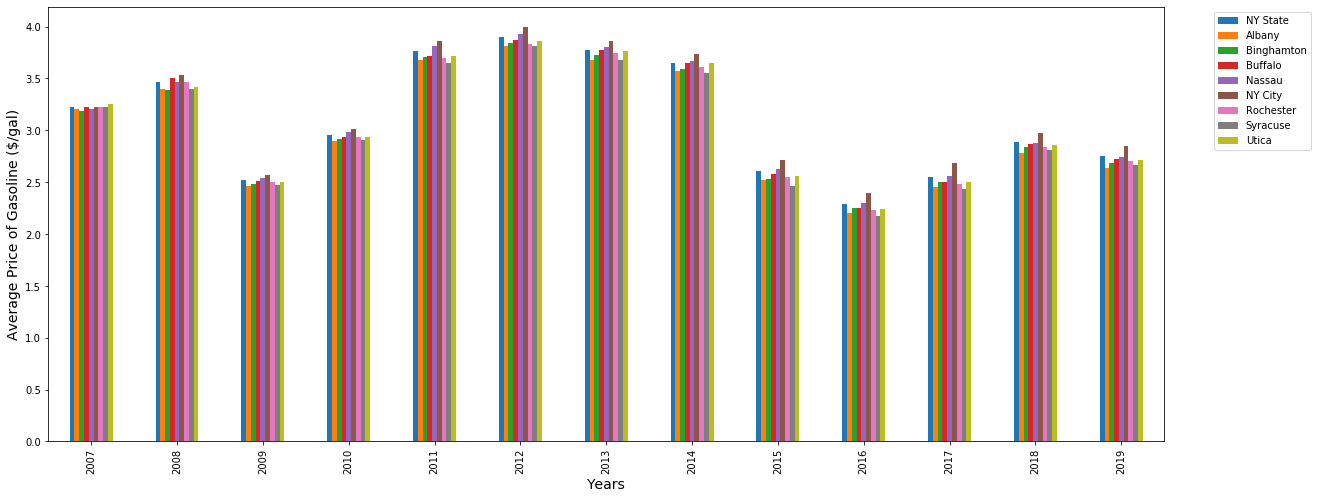

In [22]:
_=df1.plot.bar()
fig=plt.gcf()
fig.set_size_inches(20,8)
_=plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
_=plt.ylabel('Average Price of Gasoline ($/gal)',fontsize=14)
_=plt.xlabel('Years',fontsize=14)


As we can see from the graph, New York City(brown) dominates every other city in the analysis by proving to be the region with the highest gasoline price for 10 continuous years in the State of New York.

Now, to carry out analysis for the columns having missing values, we create a list with the years those cities have data for.

In [23]:
Years2=[2016,2017,2018,2019]

We create individual lists for each city.

In [24]:
col6=[]
col7=[]
col8=[]
col9=[]
col10=[]
col16=[]
col17=[]

We iterate through each city column for every specific year in the Years list and calculate the mean for each year.

In [25]:
for i in Years2:
    col6.append(df[df['year']==i]['Dutchess Average ($/gal)'].mean())
for i in Years2:
    col7.append(df[df['year']==i]['Elmira Average ($/gal)'].mean())
for i in Years2:
    col8.append(df[df['year']==i]['Glens Falls Average ($/gal)'].mean())
for i in Years2:
    col9.append(df[df['year']==i]['Ithaca Average ($/gal)'].mean())
for i in Years2:
    col10.append(df[df['year']==i]['Kingston Average ($/gal)'].mean())
for i in Years2:
    col16.append(df[df['year']==i]['Watertown Average ($/gal)'].mean())
for i in Years2:
    col17.append(df[df['year']==i]['White Plains Average ($/gal)'].mean())

Similarly, we create a new dataframe without over-writing the original dataframe and  add x,y values as a dictionary with each x value denoting a city and values denoting mean values of each year.

In [26]:
df2=pd.DataFrame({'Dutchess':col6,'Elmira':col7,'Glens':col8,'Ithaca':col9,'Kingston':col10,'Watertown':col16,'WhitePlain':col17},index=Years2)

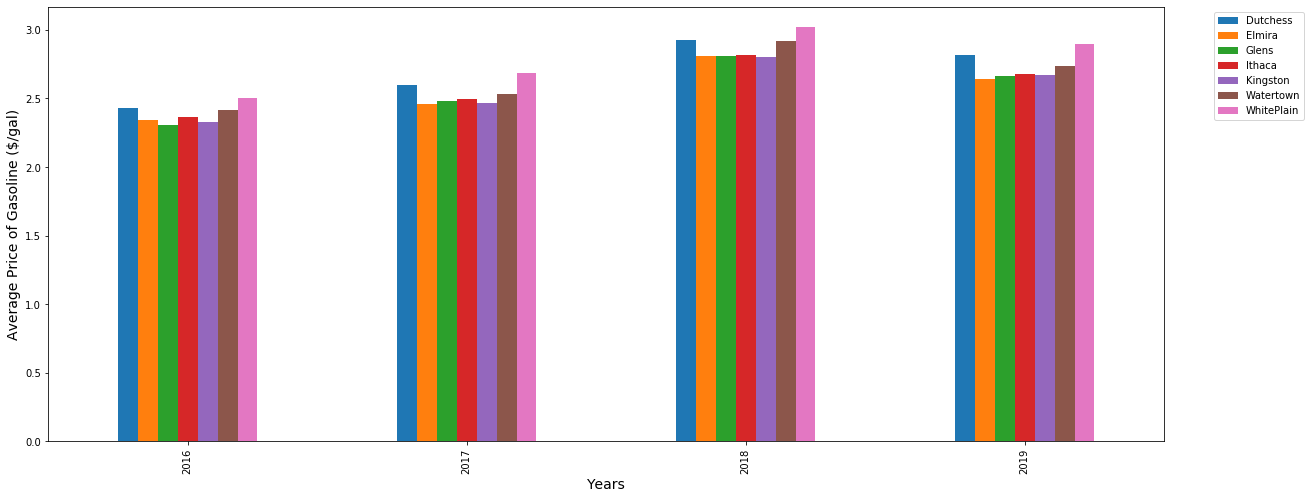

In [27]:
_=df2.plot.bar()
fig=plt.gcf()
fig.set_size_inches(20,8)
_=plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
_=plt.ylabel('Average Price of Gasoline ($/gal)',fontsize=14)
_=plt.xlabel('Years',fontsize=14)


As I initially expected, White Plain(pink) had the highest price every year from 2016-2019 consistently.


Now, to analyse the performance of New York State vs New York City currently(2019), we further create a new column in the dataframe under the month cateogary extracting the value of month in the year 2019. For ex: 7 is July, 6 is June etc.

In [28]:
df['month']=df['Date'].dt.month

In [29]:
new_df=df[df['year']==2019]

In [30]:
Months=[7,6,5,4,3,2,1]

We create empty lists for each entity and append values of the column to find mean values. 

In [31]:
list1=[]
list2=[]

for i in Months:
    list1.append(df[df['month']==i]['New York State Average ($/gal)'].mean())
for i in Months:
    list2.append(df[df['month']==i]['New York City Average ($/gal)'].mean())



In [32]:
month_df=pd.DataFrame({'NY State':list1,'NY City':list2},index=['July','June','May','April','March','February','January'])

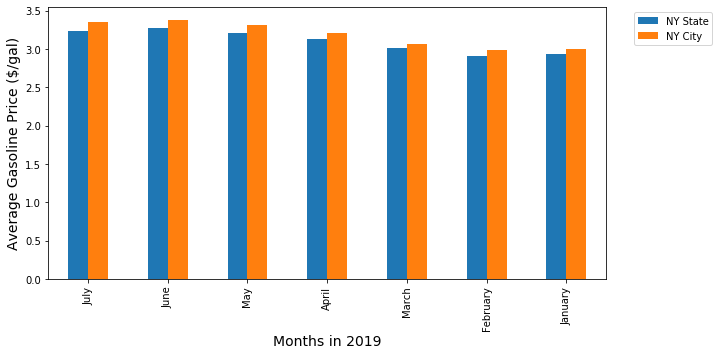

In [33]:
_=month_df.plot.bar()
fig=plt.gcf()
fig.set_size_inches(10,5)
_=plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
_=plt.ylabel('Average Gasoline Price ($/gal)',fontsize=14)
_=plt.xlabel('Months in 2019',fontsize=14)

From the analysis, we can observe that New York City had the highest average price in every month of 2019.

### What I have learnt?

We cannot always judge data by simply looking at it. Before my analysis, I expected a few things out of this dataset whereas after the Data analysis I found my presumptions to  be wrong. (New York vs White Plain). I got a brief idea on how data should be looked, read and interpreted. This was my first experience using matplotlib. Though I have implemented few of its applications, I would like to explore other features in this module.
